## DS604 Multinomial Clasification 🍷
**Prediction of Wine Quality**
### Algorithms used:
- `Sampling Methodologies`
- _`Logistic Regression`_ (Experimentaiton of Sigmoid Cutoff + Regularization)
- _`KNN`_
- _`Decision Tree`_ (Gradient Boosting)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../freelance_Data1/winequality-red.csv')
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

### EDA

<Figure size 720x576 with 0 Axes>

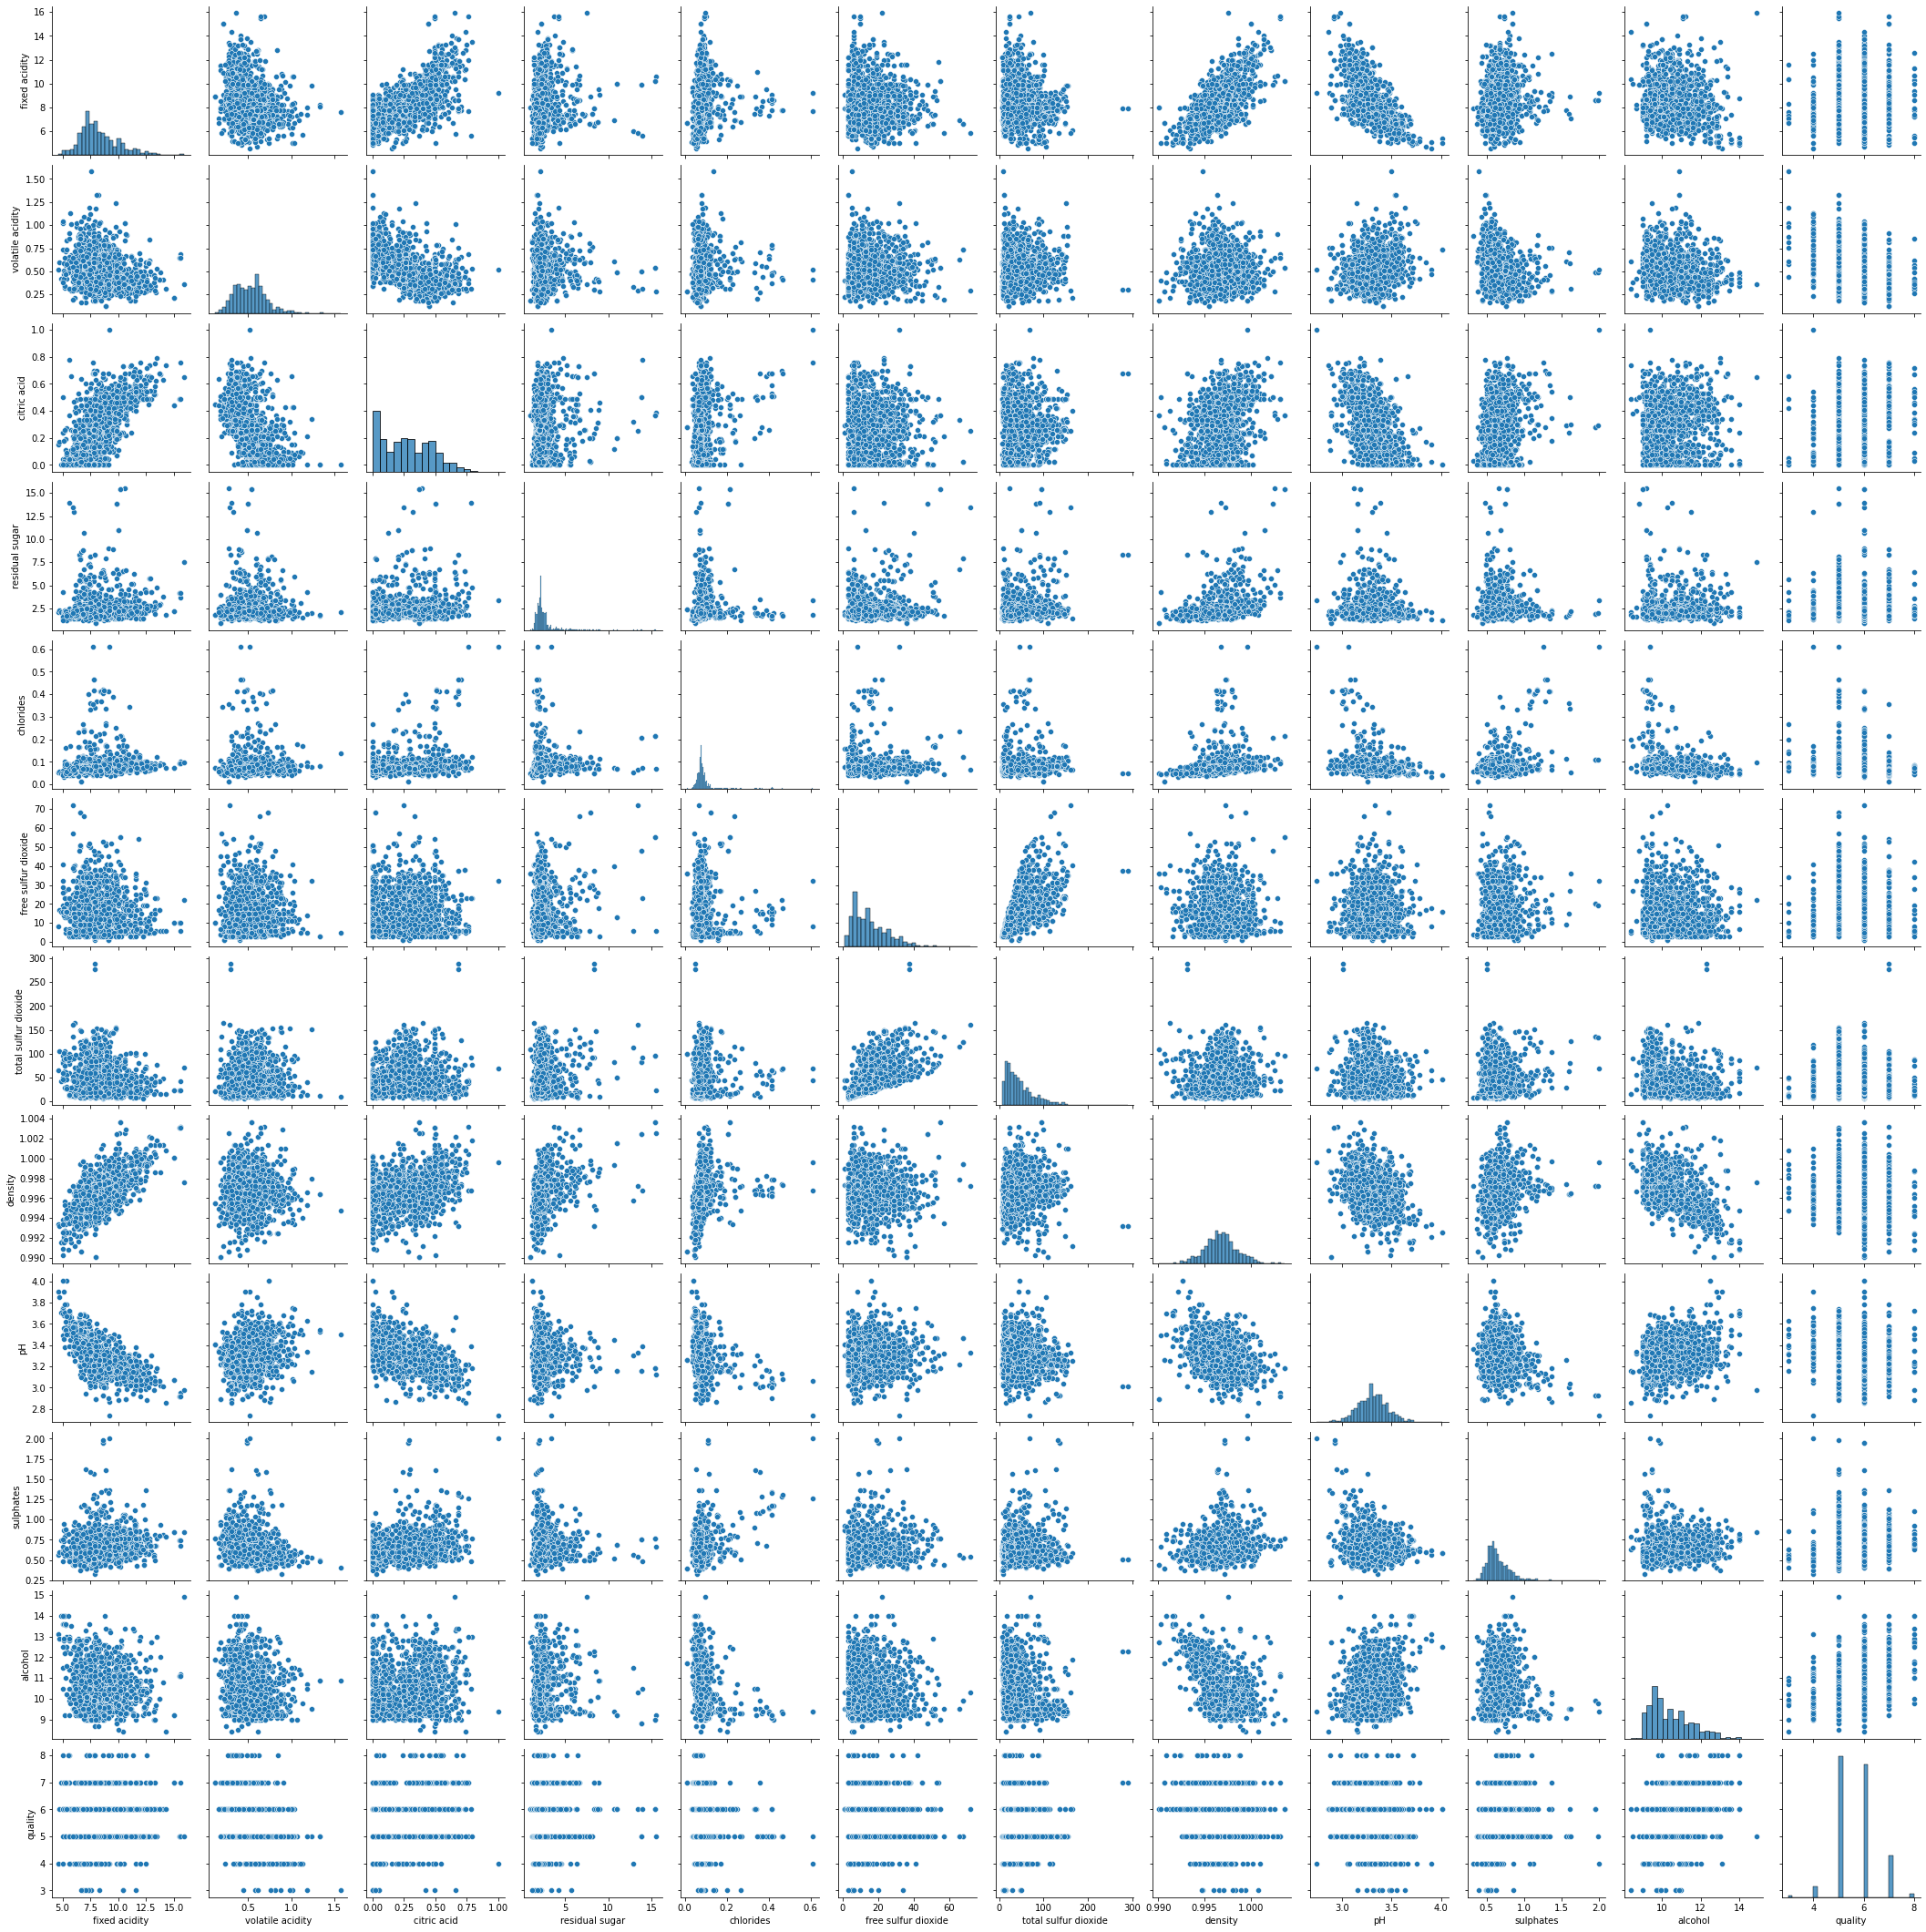

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.pairplot(df);

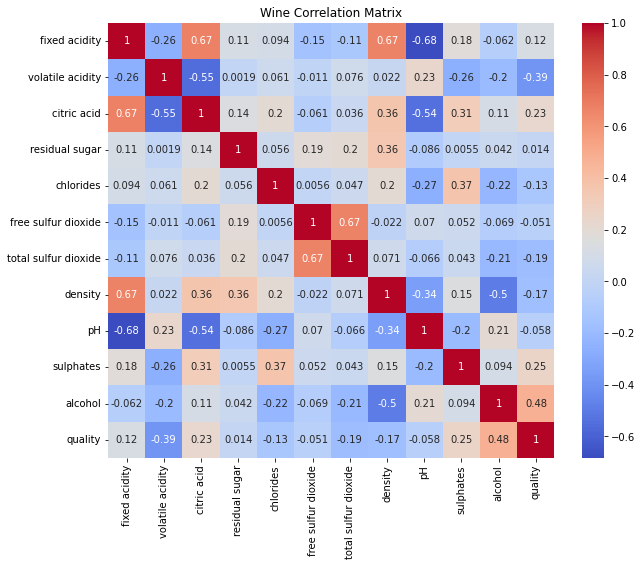

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Wine Correlation Matrix')
plt.show();

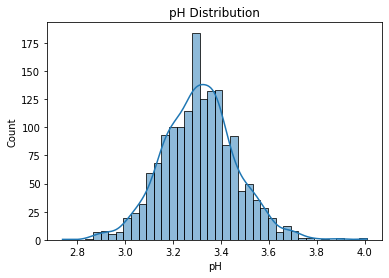

In [4]:
sns.histplot(df.pH, kde=True)
plt.title('pH Distribution');

In [5]:
#Averages Across Features Respecting Response (Quality)
df.groupby('quality').agg({col:'mean' for col in df.columns[:-1]}).style.set_properties(
    **{'background-color': 'lightblue'})

In [6]:
import plotly.express as px

def box_plot(col):
    try:
        fig = px.box(df, x='quality', y=col, color='quality', template = 'plotly_dark')
        fig.write_image(f'box_plot_{col}.png')  # Save the figure as an image file
        return fig
    except ValueError:
        print('Enter Valid Column:\n {}'.format([x for x in df.columns]))
        col = input()
        return box_plot(col)
              
              
box_plot('alcohl')

Enter Valid Column:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
alcohol


### Data Cleansing

In [7]:
print('N/A Count: \n________')
[print('{} N/A:'.format(col), sum(df[col].isna())) for col in df.columns][0]

N/A Count: 
________
fixed acidity N/A: 0
volatile acidity N/A: 0
citric acid N/A: 0
residual sugar N/A: 0
chlorides N/A: 0
free sulfur dioxide N/A: 0
total sulfur dioxide N/A: 0
density N/A: 0
pH N/A: 0
sulphates N/A: 0
alcohol N/A: 0
quality N/A: 0


In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### OverSampling Method

#### Stratified Testing Set for End Model Accuracy Measures

In [9]:
#Testing Set For Model predictions
from sklearn.model_selection import train_test_split
x_train, x_test_final, y_train, y_test_final = train_test_split(df.iloc[:,:-1], df.quality, test_size=.2,
                                                   random_state=0, stratify=df.quality)

sum(y_test_final==5)/len(y_test_final), round(sum(df.quality==5)/len(df.quality),3)
#x_test --> testing set

(0.425, 0.426)

#### Random Oversampling for Backwards Logit Regression

In [10]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split


ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])

In [11]:
#Validate Oversampling for Backw
print(y_ros.value_counts())
x_ros

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4081           12.6              0.31         0.72             2.2      0.072   
4082           12.6              0.31         0.72             2.2      0.072   
4083            8.6              0.42         0.39             1.8      0.068   
4084            5.0              0.42         0.24             2.0      0.060   
4085            5.0              0.42         0.24             2.0      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4081                  6.0                  29.0  0.99870  2.88       0.82   
4082                  6.0                  29.0  0.99870  2.88       0.82   
4083                  6.0                  12.0  0.99516  3.35       0.69   
4084                 19.0                  50.0  0.99170  3.72       0.74   
4085                 19.0                  50.0  0.99170  3.72       0.74   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
4081      9.8  
4082      9.8  
4083     11.7  
4084     14.0  
4085     14.0  

[4086 rows x 11 columns]

### Feature Selection (Backwards Method)

In [12]:
#Initial run of logit model on BALANCED DATA
import statsmodels.api as sm

x_ros = sm.add_constant(x_ros)

lr_model = sm.MNLogit(y_ros, x_ros).fit(maxiter=1000)
p_vals = lr_model.pvalues
lr_model.summary()

Optimization terminated successfully.
         Current function value: 1.054107
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                quality   No. Observations:                 4086
Model:                        MNLogit   Df Residuals:                     4026
Method:                           MLE   Df Model:                           55
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.4117
Time:                        15:55:25   Log-Likelihood:                -4307.1
converged:                       True   LL-Null:                       -7321.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  840.8821    105.731      7.953      0.000     633.653    1048.112
fixed acidity           -0.2220      0.116     -1.917      0.055      -0.449       0.005
volatile acidity        -7.3308      0.575    -12.749      0.000      -8.458      -6.204
citric acid             -1.7090      0.725     -2.357      0.018      -3.130      -0.288
residual sugar           0.2250      0.076      2.944      0.003       0.075       0.375
chlorides              -12.1343      1.473     -8.236      0.000     -15.022      -9.247
free sulfur dioxide     -0.1747      0.018     -9.899      0.000      -0.209      -0.140
total sulfur dioxide     0.0991      0.010     10.347      0.000       0.080       0.118
density               -831.8512    106.813     -7.788      0.000   -1041.201    -622.502
pH                      -6.3097      0.843     -7.489      0.000      -7.961      -4.658
sulphates                2.8791      0.637      4.521      0.000       1.631       4.127
alcohol                  1.5960      0.188      8.480      0.000       1.227       1.965
----------------------------------------------------------------------------------------
           quality=5       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  213.0671    117.194      1.818      0.069     -16.630     442.764
fixed acidity           -0.7438      0.126     -5.883      0.000      -0.992      -0.496
volatile acidity       -11.5736      0.655    -17.666      0.000     -12.858     -10.290
citric acid             -4.2208      0.760     -5.555      0.000      -5.710      -2.732
residual sugar          -0.1728      0.084     -2.065      0.039      -0.337      -0.009
chlorides              -14.6982      1.668     -8.810      0.000     -17.968     -11.428
free sulfur dioxide     -0.1488      0.017     -8.529      0.000      -0.183      -0.115
total sulfur dioxide     0.1148      0.010     11.952      0.000       0.096       0.134
density               -176.3640    118.831     -1.484      0.138    -409.268      56.540
pH                     -12.3126      0.952    -12.940      0.000     -14.178     -10.448
sulphates                1.3134      0.683      1.922      0.055      -0.026       2.653
alcohol                  1.8882      0.199      9.507      0.000       1.499       2.277
----------------------------------------------------------------------------------------
           quality=6       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  206.8766    120.088      1.723      0.085     -28.491     442.244
fixed acidity           -0.6607      0.127     -5.197      0.000      -0.910      -0.412
volatile acidity       -13.3953      0.700    -19.140      0.000     -14.767     -12.024
citric acid             -5.0172      

#### Backwards Methodology
- Algorithms extracts highest p-value feature across all outcome classes if p-value `not` significant in 3+/6 outcome classes
- p-values that `are significant` in 3+/6 outcome classes are kept in model iterations

In [13]:
def backwards_method(alpha, p_vals):  #Function takes in alpha values + Original p-value run of all features
    while True: 
        maxs, truth = [],[]
        for idx in range(len(p_vals)):    
    #        print(list(p_vals.iloc[idx,:]))
            maxs.append(max(list(p_vals.iloc[idx,1:])))

            if sum([x<.05 for x in p_vals.iloc[idx,1:]])>=3: #if p-val signficant (<alpha) for 3+ classes of outcome
    #            print(True)
                truth.append(1)

        if len(truth) >= len(p_vals): #break if all predictors contain p-vals signficant for 3+classes
            print('All Predictors < Alpha')    
            break
        else: #drop feature with highest p-val throughout all classes
            print('Dropped:', p_vals.index[maxs.index(max(maxs))], '|', 'Avg. P-Value',
                  np.mean(p_vals.iloc[maxs.index(max(maxs)),:]))
            print(p_vals, '\n')
            p_vals.reset_index(inplace=True)
            p_vals.drop(index=maxs.index(max(maxs)), inplace=True)
            #print(p_vals['index'])
            lr_model = sm.MNLogit(y_ros, x_ros[list(p_vals['index'])]).fit(maxiter=1000)
            p_vals=lr_model.pvalues
        
    print('Optimal Features:\n',p_vals)
    
backwards_method(.05, p_vals)

Dropped: citric acid | Avg. P-Value 0.18218672015001733
                                 0             1             2             3  \
const                 1.820303e-15  6.905425e-02  8.494050e-02  7.851462e-05   
fixed acidity         5.521130e-02  4.040828e-09  2.026392e-07  2.065140e-02   
volatile acidity      3.151189e-37  7.696083e-70  1.165468e-81  2.848276e-74   
citric acid           1.840540e-02  2.772026e-08  4.153923e-10  1.887443e-04   
residual sugar        3.242686e-03  3.889888e-02  1.922361e-02  7.799880e-01   
chlorides             1.783238e-16  1.255184e-18  2.451267e-27  2.038118e-33   
free sulfur dioxide   4.199636e-23  1.481755e-17  3.468441e-13  8.507906e-13   
total sulfur dioxide  4.335331e-25  6.354231e-33  1.948465e-24  1.249974e-20   
density               6.811666e-15  1.377666e-01  1.462916e-01  1.553128e-04   
pH                    6.932504e-14  2.693201e-38  1.384727e-41  7.580250e-30   
sulphates             6.144005e-06  5.462186e-02  6.723344e-09  

### Cross Validation

### Develop Model

### Model Performance Evaluation
- Accuracy Score
- AUC ROC

### HyperParameter and Sigmoid Cutoff Optimization

### XGBoost Classifier

In [ ]:
df1.

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, df.quality, test_size=.2, random_state=0,
                                                   stratify=df.quality)

y_train.value_counts()

2    545
3    510
4    159
1     42
5     15
0      8
Name: quality, dtype: int64

In [22]:
df['quality'] = df['quality'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})

In [40]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(n_estimators= 7, max_depth =10,objective='multi:softmax', num_class=len(df.quality.unique()), 
                            missing=0, seed=40, eval_metric='merror', early_stopping_rounds=10)

clf_xgb.fit(x_train, y_train,
            verbose=True,
            eval_set=[(x_test, y_test)])  # Set eval_metric to 'merror' for accuracy


[0]	validation_0-merror:0.36250
[1]	validation_0-merror:0.33750
[2]	validation_0-merror:0.33437
[3]	validation_0-merror:0.32188
[4]	validation_0-merror:0.33125
[5]	validation_0-merror:0.33437
[6]	validation_0-merror:0.32500


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=0,
              monotone_constraints=None, n_estimators=7, n_jobs=None,
              num_class=6, num_parallel_tree=None, objective='multi:softmax', ...)